# Banana Function (Rosenbrock)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim
from torch import tensor

In [2]:
a = 1
b = 100

def f(x, y):
    return (a - x)**2 + b*(y-x**2)**2

# Minimum: (a, a**2) = (1.0, 1.0), value 0.0

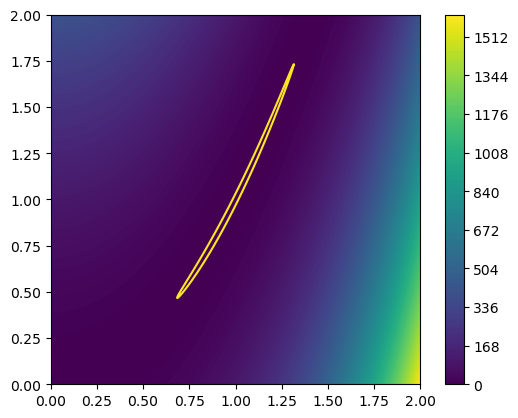

In [3]:
def contour():
    x = np.linspace(0.0, 2.0, 1000)
    y = np.linspace(0.0, 2.0, 1000)
    
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    plt.contourf(X, Y, Z, 256)
    plt.colorbar()
    plt.contour(X, Y, Z, [0.0, 0.1])
    plt.gca().set_aspect(1.0)
contour()

In [4]:
x = tensor(0.0, requires_grad=True)
y = tensor(0.0, requires_grad=True)

In [5]:
optimizer = torch.optim.SGD([x, y], lr=1e-4)

In [6]:
x.data = tensor(2.0)
y.data = tensor(1.0)
z = f(x, y)
xs, ys, zs = [x.item()], [y.item()], [z.item()]
for i in range(100_000):
    z = f(x, y)
    z.backward()
    optimizer.step()
    xs.append(x.item())
    ys.append(y.item())
    zs.append(z.item())
    x.grad.zero_()
    y.grad.zero_()
print(xs[-1], ys[-1], zs[-1])


1.003055214881897 1.0061333179473877 9.353534551337361e-06


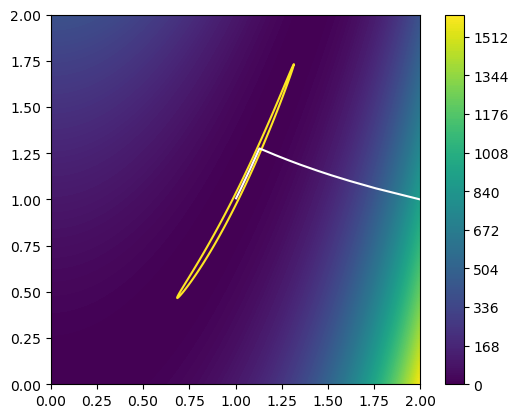

In [7]:
contour()
plt.plot(xs, ys, "w")

In [12]:
xs = np.array(xs)
ys = np.array(ys)
error = np.sqrt((xs-1.0)**2 + (ys-1.0)**2)
error

array([1.        , 0.7621653 , 0.6244461 , ..., 0.00685268, 0.00685241,
       0.00685215], dtype=float32)

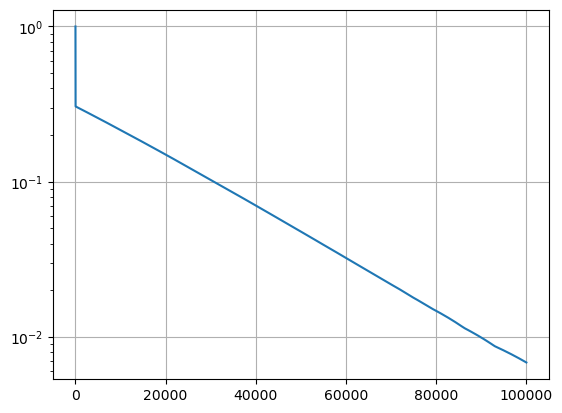

In [21]:
plt.semilogy(error)
plt.grid(True)
None

In [22]:
# TODO: tweak the optimizer parameters, try the other optimizers.